In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
from tensorflow import keras; import keras_tuner as kt

2023-10-01 16:29:47.679061: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Using TensorFlow backend


In [3]:
input_A = keras.layers.Input(shape=[5],name='wide_input')
input_B = keras.layers.Input(shape=[6],name='deep_input')
norm_layer_A = keras.layers.Normalization()
norm_layer_B = keras.layers.Normalization()
normalized_A = norm_layer_A(input_A)
normalized_B = norm_layer_B(input_B)
hidden1 = keras.layers.Dense(30,activation='relu')(normalized_B)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.concatenate([normalized_B,hidden2])
output_A = keras.layers.Dense(1,name='main_output')(concat)
output_B =keras.layers.Dense(1,name='aux_output')(hidden2)
model = keras.Model(inputs=[input_A,input_B],outputs=[output_A,output_B])
optimizer = keras.optimizers.SGD(learning_rate=3e-3)
model.compile(loss='mse',loss_weights=[0.9,0.1],optimizer = optimizer,
             metrics=['RootMeanSquaredError'])



In [4]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
X_train_full,X_test,y_train_full,y_test =train_test_split(housing.data,housing.target) 

In [5]:
x_train,x_val,y_train,y_val = train_test_split(X_train_full,y_train_full)
x_train_A,x_train_B = x_train[:,:5],x_train[:,2:]
x_test_A,x_test_B = X_test[:,:5],X_test[:,2:]
x_val_A,x_val_B = x_val[:,:5],x_val[:,2:]

In [6]:
norm_layer_A.adapt(x_train_A)
norm_layer_B.adapt(x_train_B)
history = model.fit([x_train_A,x_train_B],[y_train,y_train],epochs=10, 
                    validation_data=([x_val_A,x_val_B],[y_val,y_val]),
                    callbacks=[keras.callbacks.EarlyStopping(patience=5)])

Epoch 1/10
363/363 [==============================] - 3s 4ms/step - loss: 1.8012 - main_output_loss: 1.6439 - aux_output_loss: 3.2171 - main_output_root_mean_squared_error: 1.2821 - aux_output_root_mean_squared_error: 1.7936 - val_loss: 4.2508 - val_main_output_loss: 4.5116 - val_aux_output_loss: 1.9039 - val_main_output_root_mean_squared_error: 2.1241 - val_aux_output_root_mean_squared_error: 1.3798
Epoch 2/10
363/363 [==============================] - 1s 3ms/step - loss: 1.3675 - main_output_loss: 1.3608 - aux_output_loss: 1.4281 - main_output_root_mean_squared_error: 1.1665 - aux_output_root_mean_squared_error: 1.1950 - val_loss: 53.9854 - val_main_output_loss: 57.9691 - val_aux_output_loss: 18.1322 - val_main_output_root_mean_squared_error: 7.6137 - val_aux_output_root_mean_squared_error: 4.2582
Epoch 3/10
363/363 [==============================] - 1s 3ms/step - loss: 1.6189 - main_output_loss: 1.6352 - aux_output_loss: 1.4721 - main_output_root_mean_squared_error: 1.2788 - aux_out

In [7]:
pd.DataFrame(history.history)

,loss,main_output_loss,aux_output_loss,main_output_root_mean_squared_error,aux_output_root_mean_squared_error,val_loss,val_main_output_loss,val_aux_output_loss,val_main_output_root_mean_squared_error,val_aux_output_root_mean_squared_error
0,1.801210,1.643891,3.217087,1.282143,1.793624,4.250830,4.511605,1.903858,2.124054,1.379804
1,1.367509,1.360782,1.428059,1.166526,1.195014,53.985397,57.969093,18.132195,7.613744,4.258192
2,1.618891,1.635205,1.472063,1.278751,1.213286,4.131582,4.446695,1.295568,2.108719,1.138230
3,0.901417,0.881998,1.076195,0.939147,1.037398,3.631534,3.843328,1.725384,1.960441,1.313539
4,0.799726,0.777999,0.995265,0.882043,0.997630,2.790921,2.991564,0.985132,1.729614,0.992538
5,0.868230,0.864996,0.897339,0.930051,0.947280,1.953726,2.048701,1.098946,1.431328,1.048306
6,0.767156,0.756505,0.863023,0.869773,0.928990,1.342394,1.394305,0.875195,1.180807,0.935519
7,0.695270,0.682690,0.808487,0.826251,0.899159,0.883165,0.882453,0.889576,0.939390,0.943173
8,0.630555,0.613783,0.781502,0.783443,0.884026,0.756866,0.749457,0.823551,0.865712,0.907497
9,0.613864,0.598538,0.751806,0.773652,0.867067,0.658270,0.640566,0.817609,0.800354,0.904217


In [8]:
re = model.evaluate([x_test_A,x_test_B],[y_test,y_test],return_dict=True)

162/162 [==============================] - 0s 2ms/step - loss: 0.6153 - main_output_loss: 0.5998 - aux_output_loss: 0.7544 - main_output_root_mean_squared_error: 0.7745 - aux_output_root_mean_squared_error: 0.8686


In [9]:
re

{'loss': 0.6152626276016235,
 'main_output_loss': 0.5998006463050842,
 'aux_output_loss': 0.7544214725494385,
 'main_output_root_mean_squared_error': 0.7744680047035217,
 'aux_output_root_mean_squared_error': 0.8685743808746338}

In [10]:
fashion_mnist = keras.datasets.fashion_mnist.load_data()
(X_train_full,Y_train_full),(X_test,Y_test)=fashion_mnist
X_train,X_val = X_train_full[:-5000]/255,X_train_full[-5000:]/255
Y_train,Y_val = Y_train_full[:-5000],Y_train_full[-5000:]
X_test = X_test/255

In [11]:
class_name = ['T-shit/top','Trouser','Pullover','Dress',
             'Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

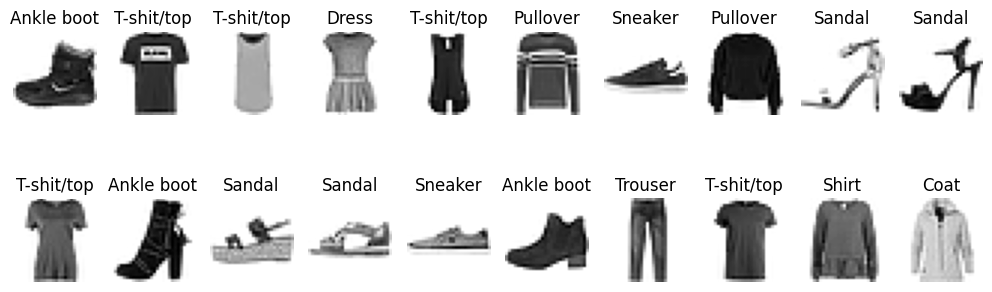

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
for i in range(20):
    plt.subplot(2,10,i+1)
    plt.imshow(X_train[i],cmap='binary')
    plt.title(class_name[Y_train[i]])
    plt.axis('off')
plt.tight_layout()
plt.show()
    

In [13]:
def build_model(hp):
    learning_rate = hp.Float('lr',min_value=1e-4,max_value=1e-2,sampling='log')
    optimizer = hp.Choice('optimizer',values=['sgd','adam'])
    if optimizer=='sgd':
        optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    else:
        optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    model = keras.models.Sequential()
    model.add(keras.layers.Flatten(input_shape=[28,28]))
    for _ in range(hp.Int('n_hidden',min_value=1,max_value=8,default=2)):
        model.add(keras.layers.Dense(hp.Int('n_neurons',min_value=16,max_value=256,step=10),activation='relu'))
    model.add(keras.layers.Dense(10,activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])
    return model
    
        

In [14]:
tuner = kt.RandomSearch(build_model,
                        objective='val_accuracy',
                        max_trials=5,
                        overwrite=True,
                        directory='my_fashion',
                        project_name='rnd_search_tuner',
                       )

In [15]:
tuner.search(X_train,Y_train,epochs=10,validation_data=(X_val,Y_val))

Trial 5 Complete [00h 00m 48s]
val_accuracy: 0.7924000024795532

Best val_accuracy So Far: 0.8822000026702881
Total elapsed time: 00h 04m 50s


In [16]:
top3 = tuner.get_best_models(num_models=3)
best_model = top3[0]

In [17]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 66)                51810     
                                                                 
 dense_1 (Dense)             (None, 66)                4422      
                                                                 
 dense_2 (Dense)             (None, 66)                4422      
                                                                 
 dense_3 (Dense)             (None, 66)                4422      
                                                                 
 dense_4 (Dense)             (None, 10)                670       
                                                                 
Total params: 65746 (256.82 KB)
Trainable params: 65746 

In [18]:
best_params = tuner.get_best_hyperparameters(num_trials=3)
best_params[0].values

{'lr': 0.00019658478253735642,
 'optimizer': 'adam',
 'n_hidden': 4,
 'n_neurons': 66}

In [19]:
best_trial = tuner.oracle.get_best_trials(num_trials=1)[0]
best_trial.summary()

Trial 2 summary
Hyperparameters:
lr: 0.00019658478253735642
optimizer: adam
n_hidden: 4
n_neurons: 66
Score: 0.8822000026702881


In [20]:
best_trial.metrics.get_last_value('val_accuracy')

0.8822000026702881

In [21]:
best_model.fit(X_train,Y_train,epochs=100,validation_data=(X_val,Y_val),
               callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2908 - accuracy: 0.8933 - val_loss: 0.3533 - val_accuracy: 0.8720
Epoch 2/100
1719/1719 [==============================] - 4s 3ms/step - loss: 0.2819 - accuracy: 0.8968 - val_loss: 0.3284 - val_accuracy: 0.8782
Epoch 3/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2739 - accuracy: 0.8988 - val_loss: 0.3232 - val_accuracy: 0.8858
Epoch 4/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2698 - accuracy: 0.9003 - val_loss: 0.3215 - val_accuracy: 0.8780
Epoch 5/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2626 - accuracy: 0.9023 - val_loss: 0.3402 - val_accuracy: 0.8744
Epoch 6/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2544 - accuracy: 0.9055 - val_loss: 0.3397 - val_accuracy: 0.8834
Epoch 7/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2503 - accuracy: 0.9070 - val_loss: 0.3239 - val_ac

In [22]:
best_model.evaluate(X_test,Y_test,return_dict=True)

313/313 [==============================] - 1s 2ms/step - loss: 0.3579 - accuracy: 0.8779


{'loss': 0.357944518327713, 'accuracy': 0.8779000043869019}

In [23]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
lr (Float)
{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}
optimizer (Choice)
{'default': 'sgd', 'conditions': [], 'values': ['sgd', 'adam'], 'ordered': False}
n_hidden (Int)
{'default': 2, 'conditions': [], 'min_value': 1, 'max_value': 8, 'step': 1, 'sampling': 'linear'}
n_neurons (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 256, 'step': 10, 'sampling': 'linear'}


In [24]:
tuner.results_summary()

Results summary
Results in my_fashion/rnd_search_tuner
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 2 summary
Hyperparameters:
lr: 0.00019658478253735642
optimizer: adam
n_hidden: 4
n_neurons: 66
Score: 0.8822000026702881

Trial 3 summary
Hyperparameters:
lr: 0.00022430710093986566
optimizer: adam
n_hidden: 1
n_neurons: 236
Score: 0.8822000026702881

Trial 0 summary
Hyperparameters:
lr: 0.0011037170688851822
optimizer: adam
n_hidden: 5
n_neurons: 126
Score: 0.8795999884605408

Trial 4 summary
Hyperparameters:
lr: 0.000540388145551427
optimizer: sgd
n_hidden: 5
n_neurons: 76
Score: 0.7924000024795532

Trial 1 summary
Hyperparameters:
lr: 0.00046884292239125904
optimizer: sgd
n_hidden: 8
n_neurons: 186
Score: 0.7796000242233276


## To fine-tune data preprocessing hyperparameters,or model.fit() arguments,such as the batch size.
-  We must subclass the kt.HyperModel class and define two methods:
1. build(). The build() method does the exact same thing as the build_model() function.
2. fit(). The fit() method takes a Hyperparameters object and a compiled model as an argument.

In [41]:
class MyClfHyperModel(kt.HyperModel):
    def build(self,hp):
        return build_model(hp)
    def fit(self, hp, model,X,y,**kwargs):
        if hp.Boolean('normalize'):
            norm_layer = keras.layers.Normalization()
            X = norm_layer(X)
        return model.fit(X,y,**kwargs)

In [42]:
hyperband_tuner = kt.Hyperband(MyClfHyperModel(),
                              objective='val_accuracy',
                              max_epochs=10,
                               factor=3,
                               hyperband_iterations=2,
                               overwrite=True,
                               directory='my_fashion_1',
                               project_name='hyperband',
                              )

In [43]:
import os
root_logdir = os.path.join(os.curdir,hyperband_tuner.project_dir, 'tensorboard')
tensor_cb = keras.callbacks.TensorBoard(root_logdir)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2)
hyperband_tuner.search(X_train,Y_train,epochs=10,validation_data=(X_val,Y_val),
                       callbacks=[early_stopping_cb,tensor_cb])

Trial 60 Complete [00h 00m 58s]
val_accuracy: 0.8611999750137329

Best val_accuracy So Far: 0.8870000243186951
Total elapsed time: 01h 26m 37s


In [44]:
top = hyperband_tuner.get_best_hyperparameters(num_trials=3)
top[0].values

{'lr': 0.0002551564182173019,
 'optimizer': 'adam',
 'n_hidden': 8,
 'n_neurons': 146,
 'normalize': True,
 'tuner/epochs': 10,
 'tuner/initial_epoch': 4,
 'tuner/bracket': 1,
 'tuner/round': 1,
 'tuner/trial_id': '0023'}

In [45]:
model3 = hyperband_tuner.get_best_models(num_models=3)
best_clf_model = model3[0]

In [46]:
best_clf_model.fit(X_train,Y_train,epochs=100,validation_data=(X_val,Y_val),callbacks=[early_stopping_cb])

Epoch 1/100
1719/1719 [==============================] - 10s 4ms/step - loss: 0.2511 - accuracy: 0.9057 - val_loss: 0.3266 - val_accuracy: 0.8812
Epoch 2/100
1719/1719 [==============================] - 8s 4ms/step - loss: 0.2411 - accuracy: 0.9100 - val_loss: 0.3122 - val_accuracy: 0.8896
Epoch 3/100
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2314 - accuracy: 0.9133 - val_loss: 0.3317 - val_accuracy: 0.8878
Epoch 4/100
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2231 - accuracy: 0.9167 - val_loss: 0.3504 - val_accuracy: 0.8786


In [47]:
best_clf_model.evaluate(X_test,Y_test,return_dict=True)

313/313 [==============================] - 1s 3ms/step - loss: 0.3736 - accuracy: 0.8754


{'loss': 0.37364503741264343, 'accuracy': 0.8754000067710876}

In [53]:
%reload_ext tensorboard
%tensorboard --logdir=./my_fashion_1/hyperband/tensorboard


In [59]:
 best_clf_model.save('my_hyperparameter_tuner.keras')

In [60]:
 best_model.save('my_Random_tuner.keras')

In [61]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 66)                51810     
                                                                 
 dense_1 (Dense)             (None, 66)                4422      
                                                                 
 dense_2 (Dense)             (None, 66)                4422      
                                                                 
 dense_3 (Dense)             (None, 66)                4422      
                                                                 
 dense_4 (Dense)             (None, 10)                670       
                                                                 
Total params: 65746 (256.82 KB)
Trainable params: 65746 

In [62]:
best_clf_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 146)               114610    
                                                                 
 dense_1 (Dense)             (None, 146)               21462     
                                                                 
 dense_2 (Dense)             (None, 146)               21462     
                                                                 
 dense_3 (Dense)             (None, 146)               21462     
                                                                 
 dense_4 (Dense)             (None, 146)               21462     
                                                                 
 dense_5 (Dense)             (None, 146)               2